<a href="https://colab.research.google.com/github/OfekYa/DataMining/blob/main/Clustera_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, silhouette_score

from google.colab import drive
drive.mount('/content/drive')

from sklearn.cluster import KMeans

Mounted at /content/drive


# Elbow Method For Optimal k

In [3]:
from kneed import KneeLocator

def k_by_elbow(scaled_data):
    Sum_of_squared_distances = []
    K = list(range(1,11))

    for num_clusters in tqdm(K) :
      #  pca = PCA(2)
       # scaled_data = pca.fit_transform(scaled_data)
        kmeans = KMeans(n_clusters=num_clusters, init="random", max_iter=500)
        kmeans.fit(scaled_data)
        Sum_of_squared_distances.append(kmeans.inertia_)

    kl = KneeLocator(K, Sum_of_squared_distances, curve="convex", direction="decreasing")
    optimal_K = 'optimal K = {}'.format(kl.elbow)
  
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.style.use("fivethirtyeight")
    plt.plot(K,Sum_of_squared_distances, 'bx-')
    plt.text(6,450, optimal_K, size=15)
    plt.xlabel('Number of Clusters') 
    plt.ylabel('Sum of squared distances(Inertia)') 
    plt.title('Elbow Method For Optimal k')

    plt.subplot(1, 2, 2)
 #   plt.style.use('ggplot')
    sns.barplot(x=K, y=Sum_of_squared_distances, palette='mako')
    plt.text(6,450, optimal_K, size=15)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of squared distances(Inertia)')
    plt.title("Elbow Method For Optimal k")
    plt.show()

# Silhouette analysis Method For Optimal k

In [4]:
def Best_Clustering(data, max_clusters = 10, visualization = True):
    
    n_clusters_list=[]
    silhouette_list=[]

        
    for n_c in range(2,max_clusters+1): 
   #     pca = PCA(2)
    #    data_std = pca.fit_transform(data)
        kmeans_model = KMeans(n_clusters=n_c, random_state=42, init="k-means++").fit(data) 
        labels = kmeans_model.labels_
        n_clusters_list.append(n_c)
        silhouette_list.append(silhouette_score(data, labels, metric='euclidean'))
    
    # Best Parameters
    param1 = n_clusters_list[np.argmax(silhouette_list)]
    param2 = max(silhouette_list)
    best_params = param1,param2
    
    # Data labeling with the best model
    kmeans_best = KMeans(n_clusters= param1 , random_state=42).fit(data) 
    labels_best = kmeans_best.labels_
    labeled_data = np.concatenate((data,labels_best.reshape(-1,1)),axis=1)
    title =  "Best Clustering:\n Optimal_K = %i & Silhouette_score = %.3f"%best_params     
    if visualization:
        fig = plt.figure(figsize=(12,6))
        ax = fig.add_subplot(111)
        ax.plot(n_clusters_list,silhouette_list, linewidth=3,
                label = "Silhouette Score Against number of Clusters")
        ax.set_xlabel("Number of clusters")
        ax.set_ylabel("Silhouette score")
        ax.set_title(title)
        ax.grid(True)
        plt.plot(param1,param2, "tomato", marker="*",
             markersize=20, label = 'Best Silhouette Score')
    
        plt.legend(loc="best",fontsize = 'large')
        plt.show();
        print( " Best Clustering corresponds to the following point : \
        Number of clusters = %i & Silhouette_score = %.2f."%best_params) 
    else:
        return best_params, labeled_data

# Train and Predict by k-means

In [5]:
def Kmeans_clustering(k_clusters, scaled_X, Y):
    
 #   pca = PCA(2)
  #  scaled_X = pca.fit_transform(scaled_X)
    kmeans = KMeans(n_clusters=k_clusters, init="k-means++", max_iter=500)
    clusters = kmeans.fit_predict(scaled_X)
    print('\nsilhouette_score: \n', metrics.silhouette_score(scaled_X, clusters, metric='euclidean'))
    print('\nhomogeneity_score: \n', metrics.homogeneity_score(Y, clusters))
    print('\nclusters centers: \n', kmeans.cluster_centers_)
    score = kmeans.score(scaled_X, Y)
    print('score: ',score)
    """ Matching the values of the clusters to the values of the labels """
    from scipy.stats import mode
    y_pred = np.zeros_like(clusters)
    for i in range(k_clusters):
        mask = (clusters == i)
        y_pred[mask] = mode(Y[mask])[0]

    print('\nAccuracy: ', metrics.accuracy_score(Y, y_pred))
    print('\nConfusion Matrix: \n', metrics.confusion_matrix(Y, y_pred))
    print('\nSummary: \n', metrics.classification_report(Y, y_pred))
  


    return kmeans, y_pred, clusters
  

# Data before Discretization

In [7]:
# load data and get dummies
file_path_before_discretization = '/content/drive/MyDrive/Colab Notebooks//Data Mining/full_data.csv' 
df_before_discretization = pd.read_csv(file_path_before_discretization, index_col=0)
df_before_discretization_one_hot = pd.get_dummies(df_before_discretization, drop_first=True)

# split to features and target
X_bd, Y_bd = df_before_discretization_one_hot[df_before_discretization_one_hot.columns[:-1]], df_before_discretization_one_hot[df_before_discretization_one_hot.columns[-1]]

# Normalize the values
scaler_bd = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled_X_bd = scaler_bd.fit_transform(X_bd)


from sklearn.decomposition import PCA
pca = PCA(2)
scaled_X_bd_pca = pca.fit_transform(scaled_X_bd)


  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 10%|█         | 1/10 [00:00<00:00,  9.39it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 20%|██        | 2/10 [00:01<00:05,  1.42it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 30%|███       | 3/10 [00:03<00:10,  1.52s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

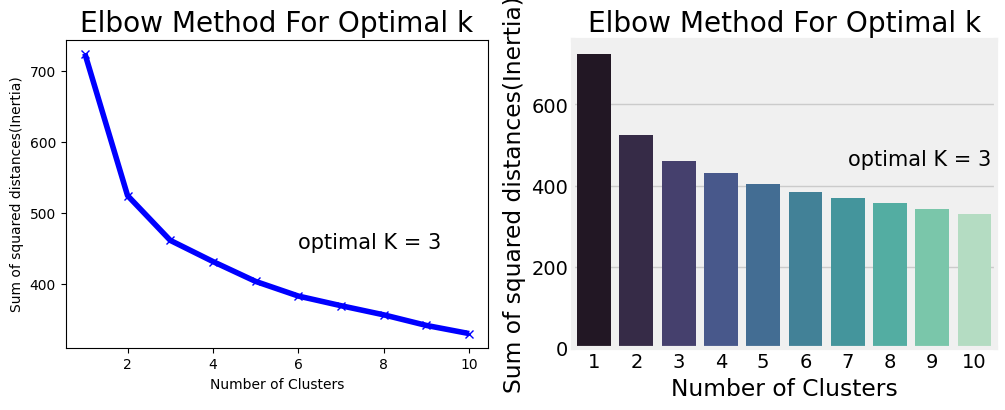

In [8]:
# Elbow Method For Optimal k
k_by_elbow(scaled_X_bd)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

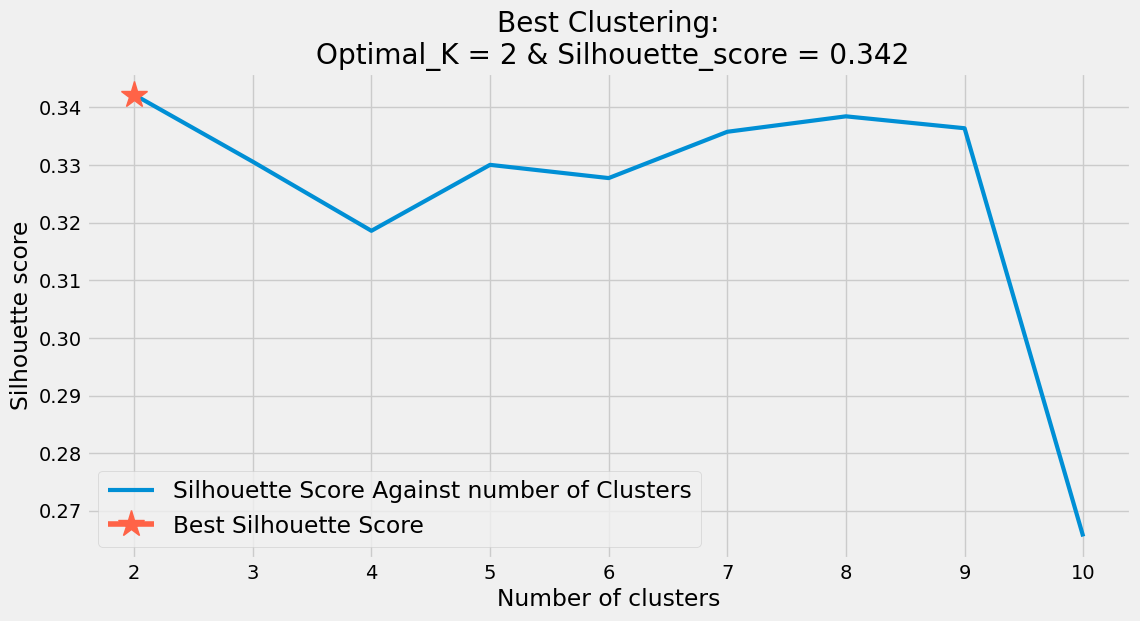

 Best Clustering corresponds to the following point :         Number of clusters = 2 & Silhouette_score = 0.34.


In [9]:
Best_Clustering(data = scaled_X_bd)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist

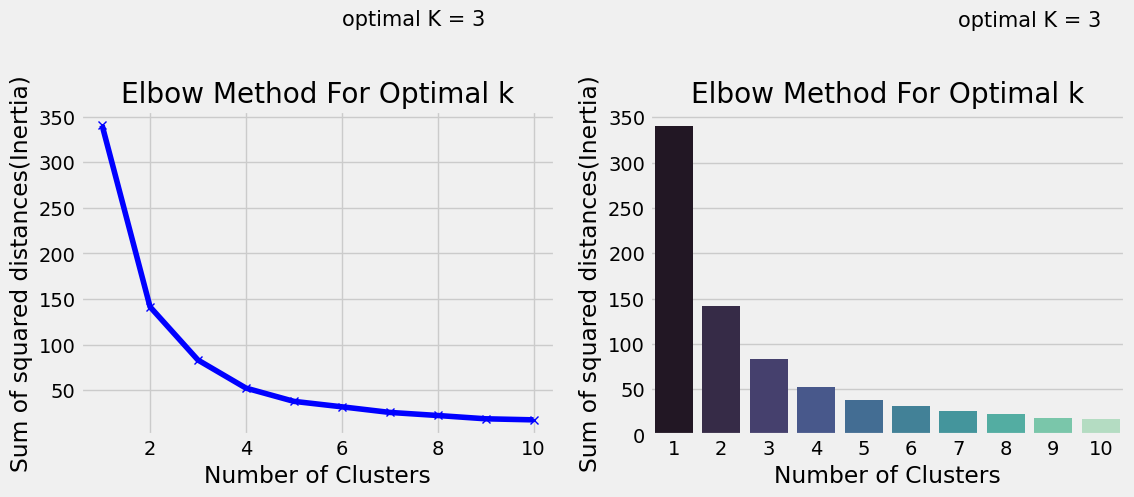

In [10]:
k_by_elbow(scaled_X_bd_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

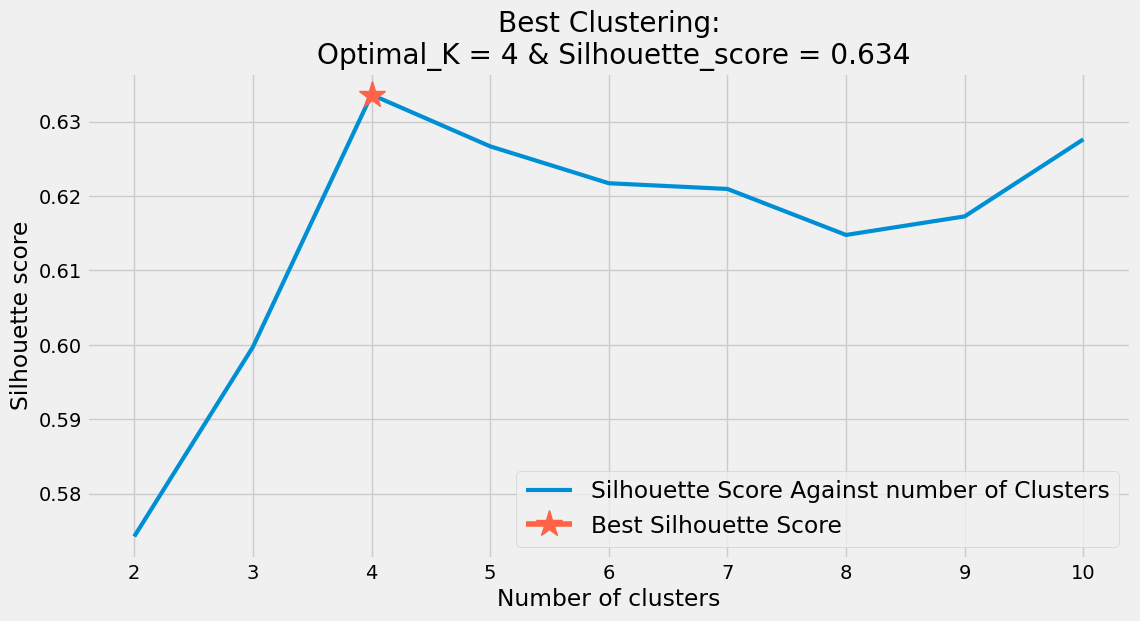

 Best Clustering corresponds to the following point :         Number of clusters = 4 & Silhouette_score = 0.63.


In [11]:
Best_Clustering(data = scaled_X_bd_pca)

In [13]:
 data_pca_k_2, y_pred_K_2, clusters_K_2 = Kmeans_clustering(2,scaled_X_bd_pca,Y_bd)


silhouette_score: 
 0.5742500571529551

homogeneity_score: 
 0.41123937960397305

clusters centers: 
 [[-0.57828243  0.08783541]
 [ 0.84081555 -0.12771161]]
score:  -141.4291073198749

Accuracy:  0.7825

Confusion Matrix: 
 [[163  87]
 [  0 150]]

Summary: 
               precision    recall  f1-score   support

           0       1.00      0.65      0.79       250
           1       0.63      1.00      0.78       150

    accuracy                           0.78       400
   macro avg       0.82      0.83      0.78       400
weighted avg       0.86      0.78      0.78       400



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-5-07168ff3492c>:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred[mask] = mode(Y[mask])[0]


In [14]:
data_pca_k_4, y_pred_K_4, clusters_K_4 = Kmeans_clustering(4,scaled_X_bd_pca,Y_bd)


silhouette_score: 
 0.6332628193294236

homogeneity_score: 
 0.6609041048639174

clusters centers: 
 [[-0.72619227  0.03545981]
 [ 1.50214152  0.35868762]
 [ 0.47708819 -0.48207193]
 [ 0.2050323   0.744295  ]]
score:  -52.345133170608065

Accuracy:  0.9125

Confusion Matrix: 
 [[215  35]
 [  0 150]]

Summary: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       250
           1       0.81      1.00      0.90       150

    accuracy                           0.91       400
   macro avg       0.91      0.93      0.91       400
weighted avg       0.93      0.91      0.91       400



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-5-07168ff3492c>:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred[mask] = mode(Y[mask])[0]


In [15]:
data_k_2, y_pred_K_2_data, clusters_K_2_data = Kmeans_clustering(2,scaled_X_bd,Y_bd)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



silhouette_score: 
 0.34220776375694106

homogeneity_score: 
 0.4037196718700091

clusters centers: 
 [[0.64688029 0.23889154 0.51086957 0.32670807 0.16273292 0.35341349
  0.1927683  0.22446573 0.75692178 0.39337474 0.49664089 0.52532781
  0.28117294 0.34147805 0.80124224 0.62732919 0.20496894 0.10559006
  0.86335404 0.75776398 0.19875776 0.44099379 0.39751553 0.32919255]
 [0.50556295 0.18120373 0.71966527 0.08117155 0.02259414 0.21263813
  0.0785326  0.05564617 0.80536841 0.3531873  0.73828025 0.75834496
  0.23979564 0.50847458 0.93723849 0.93305439 0.0376569  0.0209205
  0.0334728  0.06276151 0.0083682  0.0460251  0.05020921 0.0292887 ]]
score:  -524.2248062937808

Accuracy:  0.7775

Confusion Matrix: 
 [[161  89]
 [  0 150]]

Summary: 
               precision    recall  f1-score   support

           0       1.00      0.64      0.78       250
           1       0.63      1.00      0.77       150

    accuracy                           0.78       400
   macro avg       0.81      0.

<ipython-input-5-07168ff3492c>:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred[mask] = mode(Y[mask])[0]


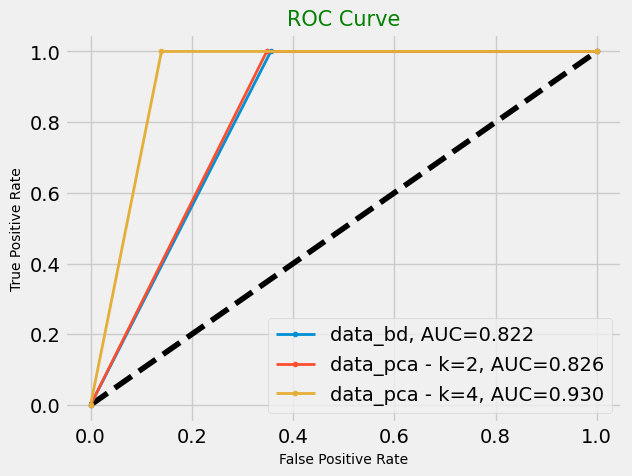

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr1, tpr1, thresholds1 = roc_curve(Y_bd, y_pred_K_2_data)
auc1 = roc_auc_score(Y_bd, y_pred_K_2_data)

fpr2, tpr2, thresholds2 = roc_curve(Y_bd, y_pred_K_2)
auc2 = roc_auc_score(Y_bd, y_pred_K_2)

fpr3, tpr3, thresholds3 = roc_curve(Y_bd, y_pred_K_4)
auc3 = roc_auc_score(Y_bd, y_pred_K_4)

plt.plot([0,1],[0,1],'k--')

plt.plot(fpr1, tpr1, marker='.', label='data_bd, AUC={0:.3f}'.format(auc1), linewidth=2)
plt.plot(fpr2, tpr2, marker='.', label='data_pca - k=2, AUC={0:.3f}'.format(auc2), linewidth=2)
plt.plot(fpr3, tpr3, marker='.', label='data_pca - k=4, AUC={0:.3f}'.format(auc3), linewidth=2)

plt.xlabel('False Positive Rate', size=10)
plt.ylabel('True Positive Rate', size=10)
plt.legend()
# show the plot
plt.title('ROC Curve', size=15, color='green');